<a href="https://colab.research.google.com/github/Kwangbin/Keras_Basic/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 단순한 1차 방정식 y = m*X + b로 설명했는데, 이건 그냥 단순선형회귀

아무튼 우리가 사는 세상은 단순선형회귀로 설명할 수 있을만큼 그렇게 단순하지 않다. 고려해야 하는 변수 X가 하나가 아니라는 의미다.

예를 들어 주택 임대료를 예측한다고 했을 때, 주택의 면적만 고려해서 예측하면 단순회귀가 되겠지만 지어진지 얼마나 오래 되었는지, 지하철 역과 거리가 얼마나 가까운지 등 다양한 요소의 영향을 받는다. 결국 주택 임대료 y를 예측하려면 여러 개의 변수 x를 포함해야 하는 거다

y = m1*X1 + m2*X2 + m2*X2 +mn*Xn    + b

In [2]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cd /content/drive/MyDrive/ml/data/titanic/

/content/drive/MyDrive/ml/data/titanic


In [4]:
ls

brooklyn.csv           president_heights.csv  train.csv
gender_submission.csv  queens.csv             weight-height01.csv
heights.csv            streeteasy.csv         weight-height02.csv
manhattan.csv          test.csv


In [10]:
#데이터 불러오기
df = pd.read_csv("manhattan.csv")
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


데이터 세트 분리하기 (Training & Test)

가지고 있는 데이터를 모두 사용해서 다중선형회귀 모델을 만들 수도 있지만, 우리는 실제로 생성한 모델이 잘 예측하는지 테스트를 해보기 위해 학습(train) 데이터와 시험(test) 데이터를 분리해보자. (모든 데이터에 주택 임대료 “rent” 정답이 있으니, 시험 데이터를 예측 모델에 넣어서 실제 정답을 잘 맞추는지 보기 위함이다.)


In [11]:
#8:2 비율로 분리
from sklearn.model_selection import train_test_split
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]
y = df[['rent']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [12]:
#모델 생성

from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

이제 만약 내가 주택에 대한 14개 항목값 넣어주면 주택 임대료를 예측해준다.

In [13]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
my_predict = mlr.predict(my_apartment)

In [14]:
my_predict

array([[2554.96979774]])

In [20]:
y_predict = mlr.predict(x_test)

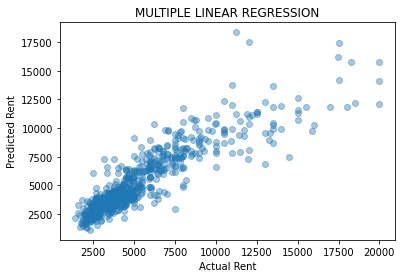

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

회귀계수와 상수 확인하기

y = m1X1 + m2X2 + m2X2 +mnXn + b

그런데 다중회귀에서는 변수가 많기 때문에 조금 표현을 달리해야겠다. 일단 모든 변수 x마다 각각의 m이 있다. 그러니 이것들을 회귀계수라고 부르자. 그리고 b는 그냥 상수라고 부르자.

In [22]:
mlr.coef_

array([[-275.94735303, 1151.99212388,    4.85456267,  -13.48380961,
          22.2491075 ,   -7.39035927, -132.60215307,   36.67044395,
         159.38153047, -207.4624688 ,  122.04665426,  -13.79477269,
         -36.67742984,  -44.4050719 ]])

위 모델에서 총 14개의 변수를 사용했기 때문에 회귀계수도 당연히 14개가 존재한다.

In [23]:
mlr.intercept_

array([-389.46394626])

상관 살펴보기

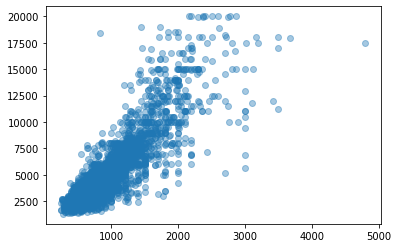

In [24]:
# 주택의 면적 'size_sqft'과 가격 'rent'
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.show()

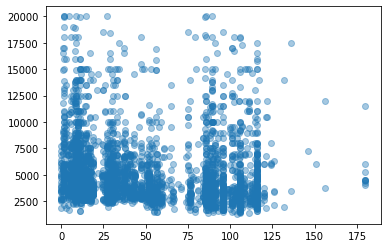

In [25]:
# 주택이 얼마나 오래 전에 지어졌는지 'building_age_yrs'와 가격 'rent'
plt.scatter(df[['building_age_yrs']], df[['rent']], alpha=0.4)
plt.show()

일단 이 두 개의 그림만 봐도 주택 면적은 상관이 있는데 얼마나 오래된 건물인지는 딱히 상관이 나타나지 않는 걸 알 수 있다.

모델의 정확도(Accuracy) 평가하기

다중선형회귀 모델의 정확도를 평가할 때는 잔차 분석(Analysis)을 하면 된다. 잔차는 실제 값 y와 예측된 값 ŷ의 차 e를 말한다. 방정식으로 표현하면 이렇게.

e= y -ŷ 

sklearn의 linear_model.LinearRegression를 사용해서 모델을 생성하면 .score()라는 메서드를 사용할 수 있는데 R²라고 하는 결정계수(coefficient of determination)를 돌려준다. 결정계수 R²은 이렇게 표현할 수 있다.

1-(u/v)

분자에 있는 u는 잔차의 제곱의 평균 RSS(residual sum of square)는 직선이 미처 Y에 대해 설명하지 못한 변화량을 의미한다.

((y - y_predict) ** 2).sum()

분모에 있는 v는 TSS(total sum of squares), y값의 총 변화량으로 이해하면 된다.

((y - y.mean()) ** 2).sum()

결정계수 R²가 클수록 실제값과 예측값이 유사함을 의미하며, 데이터를 잘 설명한다

그러니 모델이 얼마나 정확한지 평가할 때도 이 결정계수 R²가 기준이 될 수 있는 거다.

예를 들어, 주택 사이즈(“size_sqft”)와 침실 개수(“bedrooms”)를 기준으로 임대료를 예측하는 모델의 R²이 0.72인 경우 그 2개의 변수들이 함께 임대료 변동의 72%를 설명한다는 뜻이다.

여기에 다른 x 변수, 주택이 얼마나 오래 전에 지어졌는지(“building_age_yrs”)를 모델에 추가하면 새로운 R²가 0.95로 증가했다고 하자. 그럼 주택 사이즈(“size_sqft”), 침실 개수(“bedrooms”), 얼마나 오래 전에 지어졌는지(“building_age_yrs”) 이 3개의 변수가 함께 임대료 변동의 95%를 설명한다는 거다.

In [27]:
print(mlr.score(x_train, y_train))

0.7732804790939135


당연히 최선의 R²는 1이겠지만 그건 말이 안 되고, 일반적으로 0.7 정도면 양호한 것으로 간주한다.

주택 임대료의 77%를 저 14개의 항목으로 설명할 수 있다는 의미다.

